<a href="https://colab.research.google.com/github/Raghnus/coding-dojo/blob/main/Track2/EjercicioKMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Ejercicio KMeans**
###Autor: Juan Játiva
###Fecha de creación: 2022/02/25
###Fecha última actualización: 2022/02/25

##**Descripción**
Haciendo uso del método KMean, agrupar diferentes conjuntos de clientes y buscar tendencias.

##Montaje de datos e importación del librerias.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [260]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

##Exploración y limpieza de datos.

In [117]:
df = pd.read_csv('/content/drive/MyDrive/PTCienciaDatos/MachineLearning/cust_seg.csv')
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Customer Id      850 non-null    int64  
 2   Age              850 non-null    int64  
 3   Edu              850 non-null    int64  
 4   Years Employed   850 non-null    int64  
 5   Income           850 non-null    int64  
 6   Card Debt        850 non-null    float64
 7   Other Debt       850 non-null    float64
 8   Defaulted        700 non-null    float64
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 66.5 KB


In [119]:
print('Porcentaje de valores faltantes',round((df['Defaulted'].isna().sum()*100)/len(df),2),'%')

Porcentaje de valores faltantes 17.65 %


In [120]:
df = df.dropna(how='any')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       700 non-null    int64  
 1   Customer Id      700 non-null    int64  
 2   Age              700 non-null    int64  
 3   Edu              700 non-null    int64  
 4   Years Employed   700 non-null    int64  
 5   Income           700 non-null    int64  
 6   Card Debt        700 non-null    float64
 7   Other Debt       700 non-null    float64
 8   Defaulted        700 non-null    float64
 9   DebtIncomeRatio  700 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 60.2 KB


In [121]:
df['Debt'] = df['Card Debt']+df['Other Debt']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [151]:
df_kmean = df[['Age','Years Employed','Income','Debt', 'Defaulted','DebtIncomeRatio']]
df_kmean.head()

,Age,Years Employed,Income,Debt,Defaulted,DebtIncomeRatio
0,41,6,19,1.197,0.0,6.3
1,47,26,100,12.800,0.0,12.8
2,33,10,57,11.913,1.0,20.9
3,29,4,19,1.197,0.0,6.3
4,47,31,253,18.216,0.0,7.2


In [135]:
df_kmean.corr()

,Age,Years Employed,Income,Debt,Defaulted,DebtIncomeRatio
Age,1.000000,0.536497,0.478710,0.355122,-0.137657,0.016398
Years Employed,0.536497,1.000000,0.619681,0.446016,-0.282978,-0.031182
Income,0.478710,0.619681,1.000000,0.654803,-0.070970,-0.026777
Debt,0.355122,0.446016,0.654803,1.000000,0.203114,0.608023
Defaulted,-0.137657,-0.282978,-0.070970,0.203114,1.000000,0.389575
DebtIncomeRatio,0.016398,-0.031182,-0.026777,0.608023,0.389575,1.000000


##Constitución del modelo.

In [154]:
siluetas = []
for x in range (2,12):
  kmeans = KMeans(n_clusters=x, init='random')
  kmeans.fit(df_kmean)
  siluetas.append(silhouette_score(df_kmean, kmeans.labels_))

Text(0, 0.5, 'Score silueta')

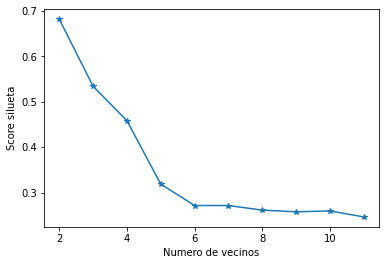

In [155]:
plt.plot(range(2,12),siluetas, marker='*')
plt.xlabel('Numero de vecinos')
plt.ylabel('Score silueta')

In [156]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_kmean)
round((silhouette_score(df_kmean, kmeans.labels_)*100),2)

68.18

In [157]:
df_kmean['Cluster'] = kmeans.predict(df_kmean)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


##Busqueda de tendencias

In [158]:
df_kmean.head()

,Age,Years Employed,Income,Debt,Defaulted,DebtIncomeRatio,Cluster
0,41,6,19,1.197,0.0,6.3,0
1,47,26,100,12.800,0.0,12.8,1
2,33,10,57,11.913,1.0,20.9,0
3,29,4,19,1.197,0.0,6.3,0
4,47,31,253,18.216,0.0,7.2,1


In [ ]:
df_kmean['Cluster'] = df_kmean['Cluster'].replace([0,1],['Grupo 1','Grupo 2'])

In [253]:
df_kmean.groupby(['Cluster'])['Age'].count()

Cluster
Grupo 1    635
Grupo 2     65
Name: Age, dtype: int64

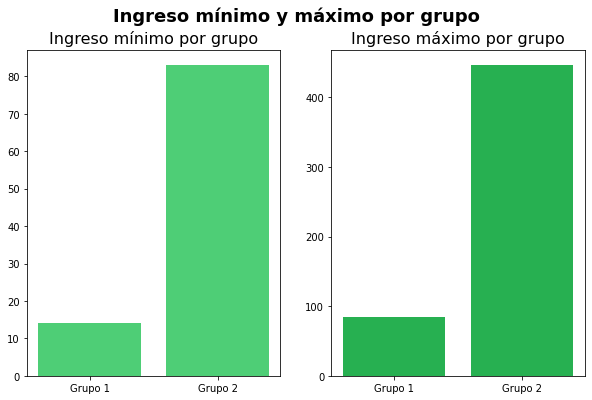

In [299]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.bar(df_kmean.groupby(['Cluster'])['Age'].count().index,df_kmean.groupby(['Cluster'])['Income'].min().values, fc='#4ECE76')
plt.title('Ingreso mínimo por grupo', fontsize=16)
plt.subplot(1,2,2)
plt.bar(df_kmean.groupby(['Cluster'])['Age'].count().index,df_kmean.groupby(['Cluster'])['Income'].max().values, fc='#27B051')
plt.title('Ingreso máximo por grupo', fontsize=16)
plt.suptitle('Ingreso mínimo y máximo por grupo', fontsize=18, fontweight='bold');

**Observación.- En base a los gráficos, podemos mensionar que el grupo 2 tiende a tener un mayor ingreso económico.**

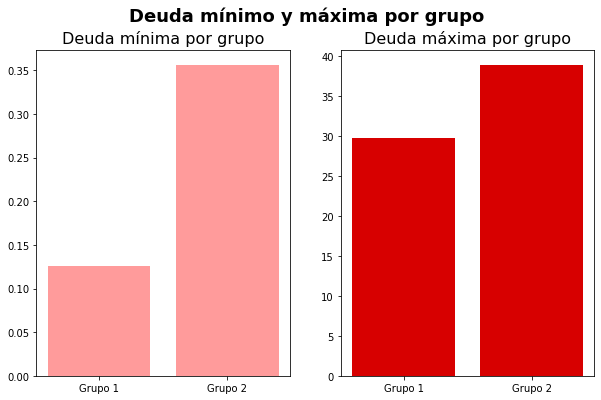

In [302]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.bar(df_kmean.groupby(['Cluster'])['Age'].count().index,df_kmean.groupby(['Cluster'])['Debt'].min().values, fc='#FF9B9B')
plt.title('Deuda mínima por grupo', fontsize=16)
plt.subplot(1,2,2)
plt.bar(df_kmean.groupby(['Cluster'])['Age'].count().index,df_kmean.groupby(['Cluster'])['Debt'].max().values, fc='#D70000')
plt.title('Deuda máxima por grupo', fontsize=16)
plt.suptitle('Deuda mínimo y máxima por grupo', fontsize=18, fontweight='bold');

**Observación.- En base al gráfico, podemos mensionar que el grupo 2 tiende a endeudarse más que el grupo 1.**

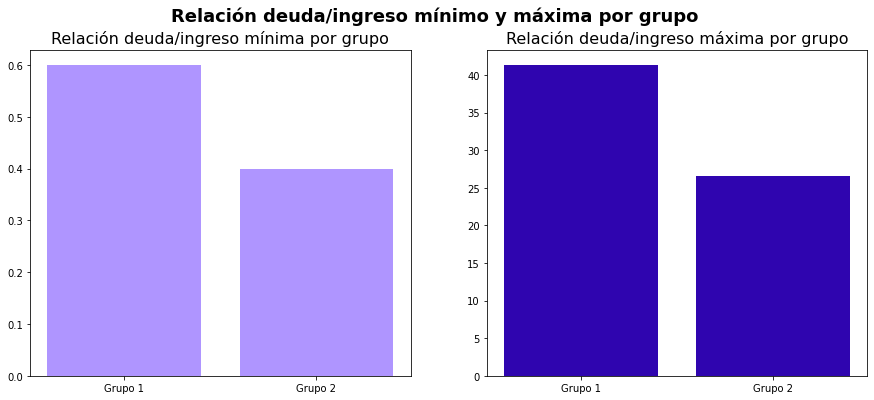

In [293]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.bar(df_kmean.groupby(['Cluster'])['Age'].count().index,df_kmean.groupby(['Cluster'])['DebtIncomeRatio'].min().values, fc='#AF95FF')
plt.title('Relación deuda/ingreso mínima por grupo', fontsize=16)
plt.subplot(1,2,2)
plt.bar(df_kmean.groupby(['Cluster'])['Age'].count().index,df_kmean.groupby(['Cluster'])['DebtIncomeRatio'].max().values, fc='#2F05AF')
plt.title('Relación deuda/ingreso máxima por grupo', fontsize=16)
plt.suptitle('Relación deuda/ingreso mínimo y máxima por grupo', fontsize=18, fontweight='bold');

**Observación.- En base al gráfico, podemos mensionar que el grupo 1 tiene una mayor relación deuda/ingreso, que el grupoo 2.**

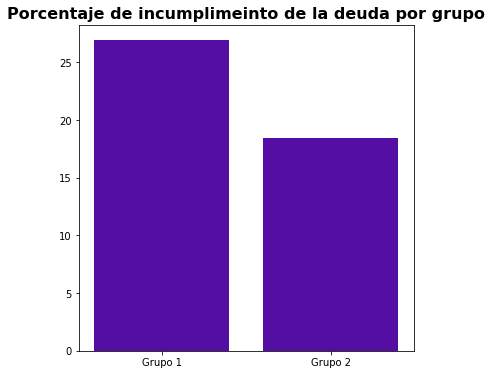

In [283]:
#Calculo del porcentaje de incumplimiento de la deuda por grupo
((df_kmean.groupby(['Cluster'])['Defaulted'].sum()[0]*100)/(df_kmean.groupby(['Cluster'])['Age'].count()[0]))
((df_kmean.groupby(['Cluster'])['Defaulted'].sum()[1]*100)/(df_kmean.groupby(['Cluster'])['Age'].count()[1]))
porcen = [((df_kmean.groupby(['Cluster'])['Defaulted'].sum()[0]*100)/(df_kmean.groupby(['Cluster'])['Age'].count()[0])),
          ((df_kmean.groupby(['Cluster'])['Defaulted'].sum()[1]*100)/(df_kmean.groupby(['Cluster'])['Age'].count()[1]))]

plt.figure(figsize=(6,6))
plt.bar(df_kmean.groupby(['Cluster'])['Age'].count().index,porcen, fc='#550EA4')
plt.title('Porcentaje de incumplimeinto de la deuda por grupo', fontsize=16, fontweight='bold');

**Observación.- En base al gráfico, podemos mensionar que el grupo 1 tiende a tener un mayor incumplimiento con las deudas contraidas.**